<a href="https://colab.research.google.com/github/GraziPeregrino/Sedentarism-Inflluences-over-Sleep/blob/main/7200_stat_project_datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LONGITUDINAL_by_day.csv")

In [40]:
df.columns

Index(['PARTICIPANT', 'DAY_NUM', 'WEEK_NUM', 'DATE', 'Ambulation',
       'Incomplete_Predictions', 'Nonwear', 'Sedentary', 'Sleep',
       'Upright (Other)', 'HOURS_COVERAGE'],
      dtype='object')

In [41]:
df

,PARTICIPANT,DAY_NUM,WEEK_NUM,DATE,Ambulation,Incomplete_Predictions,Nonwear,Sedentary,Sleep,Upright (Other),HOURS_COVERAGE
0,CR01,-3,-1,2021-04-16,0.550833,0.010833,0.000000,14.598611,8.500000,0.339722,24.000000
1,CR01,-2,-1,2021-04-17,1.486111,0.010000,0.000000,14.153889,8.133333,0.216667,24.000000
2,CR01,-1,-1,2021-04-18,0.866667,0.016667,0.000000,12.391667,10.341667,0.383333,24.000000
3,CR01,0,0,2021-04-19,1.761667,0.013333,0.000000,13.115000,8.633333,0.476667,24.000000
4,CR01,1,0,2021-04-20,0.718889,0.016667,0.000000,15.331667,7.616944,0.315833,24.000000
...,...,...,...,...,...,...,...,...,...,...,...
4853,CR46,115,16,2022-07-14,0.057500,0.000000,0.000000,12.671389,10.400278,0.829444,23.958611
4854,CR46,116,16,2022-07-15,0.035556,0.005833,3.883333,7.997500,11.575000,0.492222,23.989444
4855,CR46,117,16,2022-07-16,0.177778,0.002500,0.000000,11.996389,11.158333,0.656944,23.991944
4856,CR46,118,16,2022-07-17,0.028889,0.001111,0.000000,12.378333,10.783333,0.791944,23.983611


Filter out the WEEK_NUM which is not in [0,16]

In [42]:
df_filtered = df[df['WEEK_NUM'].between(0, 16)]

In [43]:
T_C = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_events_by_pt_only_week80.csv')
T_C.head(3)

merged_df = df_filtered.merge(T_C[['ID', 'group']], left_on='PARTICIPANT', right_on='ID', how='left')

# Drop the ID column as it's redundant
merged_df.drop('ID', axis=1, inplace=True)
merged_df

,PARTICIPANT,DAY_NUM,WEEK_NUM,DATE,Ambulation,Incomplete_Predictions,Nonwear,Sedentary,Sleep,Upright (Other),HOURS_COVERAGE,group
0,CR01,0,0,2021-04-19,1.761667,0.013333,0.000000,13.115000,8.633333,0.476667,24.000000,Treatment
1,CR01,1,0,2021-04-20,0.718889,0.016667,0.000000,15.331667,7.616944,0.315833,24.000000,Treatment
2,CR01,2,0,2021-04-21,1.124167,0.017778,0.000000,14.411667,8.075000,0.371389,24.000000,Treatment
3,CR01,3,0,2021-04-22,0.473056,0.016667,0.000000,14.856667,8.341667,0.311944,24.000000,Treatment
4,CR01,4,0,2021-04-23,2.063333,0.021389,0.000000,12.088611,8.883333,0.943333,24.000000,Treatment
...,...,...,...,...,...,...,...,...,...,...,...,...
4532,CR46,114,16,2022-07-13,0.042222,0.005833,0.000000,12.851667,10.516667,0.573056,23.989444,Control
4533,CR46,115,16,2022-07-14,0.057500,0.000000,0.000000,12.671389,10.400278,0.829444,23.958611,Control
4534,CR46,116,16,2022-07-15,0.035556,0.005833,3.883333,7.997500,11.575000,0.492222,23.989444,Control
4535,CR46,117,16,2022-07-16,0.177778,0.002500,0.000000,11.996389,11.158333,0.656944,23.991944,Control


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


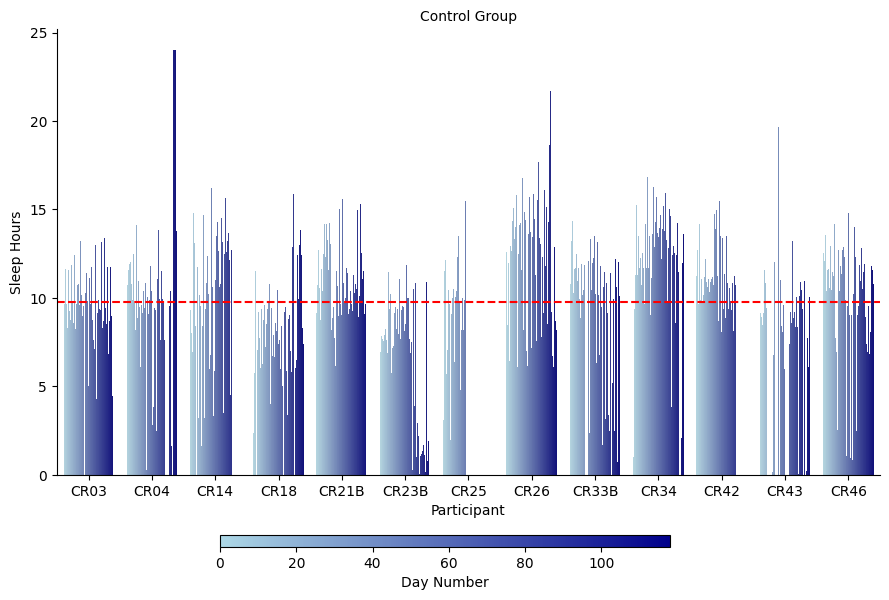

In [ ]:
import numpy as np
import matplotlib as mpl

merged_df = merged_df[merged_df['group'] == 'Control']

custom_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "custom_blues", ["lightblue", "darkblue"]
)

unique_days = merged_df["DAY_NUM"].unique()
norm = plt.Normalize(unique_days.min(), unique_days.max())
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Necessary for the colorbar

# Create a color palette for all unique days
palette = {day: sm.to_rgba(day) for day in unique_days}

# Set up the figure and axis
g = sns.FacetGrid(merged_df, col="group", height=6, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x="PARTICIPANT", y="Sleep", hue="DAY_NUM", palette=palette, ci=None, dodge=True)

# Set titles and axis labels
g.set_titles("{col_name} Group")
g.set_axis_labels("Participant", "Sleep Hours")

# Compute and plot the average line for each group
for ax, (group_name, group_data) in zip(g.axes.flat, merged_df.groupby("group")):

    avg_sleep = group_data["Sleep"].mean()
    ax.axhline(avg_sleep, color="red", linestyle="--", label="Average")

# Adjust the figure size to accommodate the colorbar
g.fig.subplots_adjust(bottom=0.2)

# Add the continuous colorbar below the plot
cbar_ax = g.fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Day Number')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
<ipython-input-30-4a99612fbb59>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


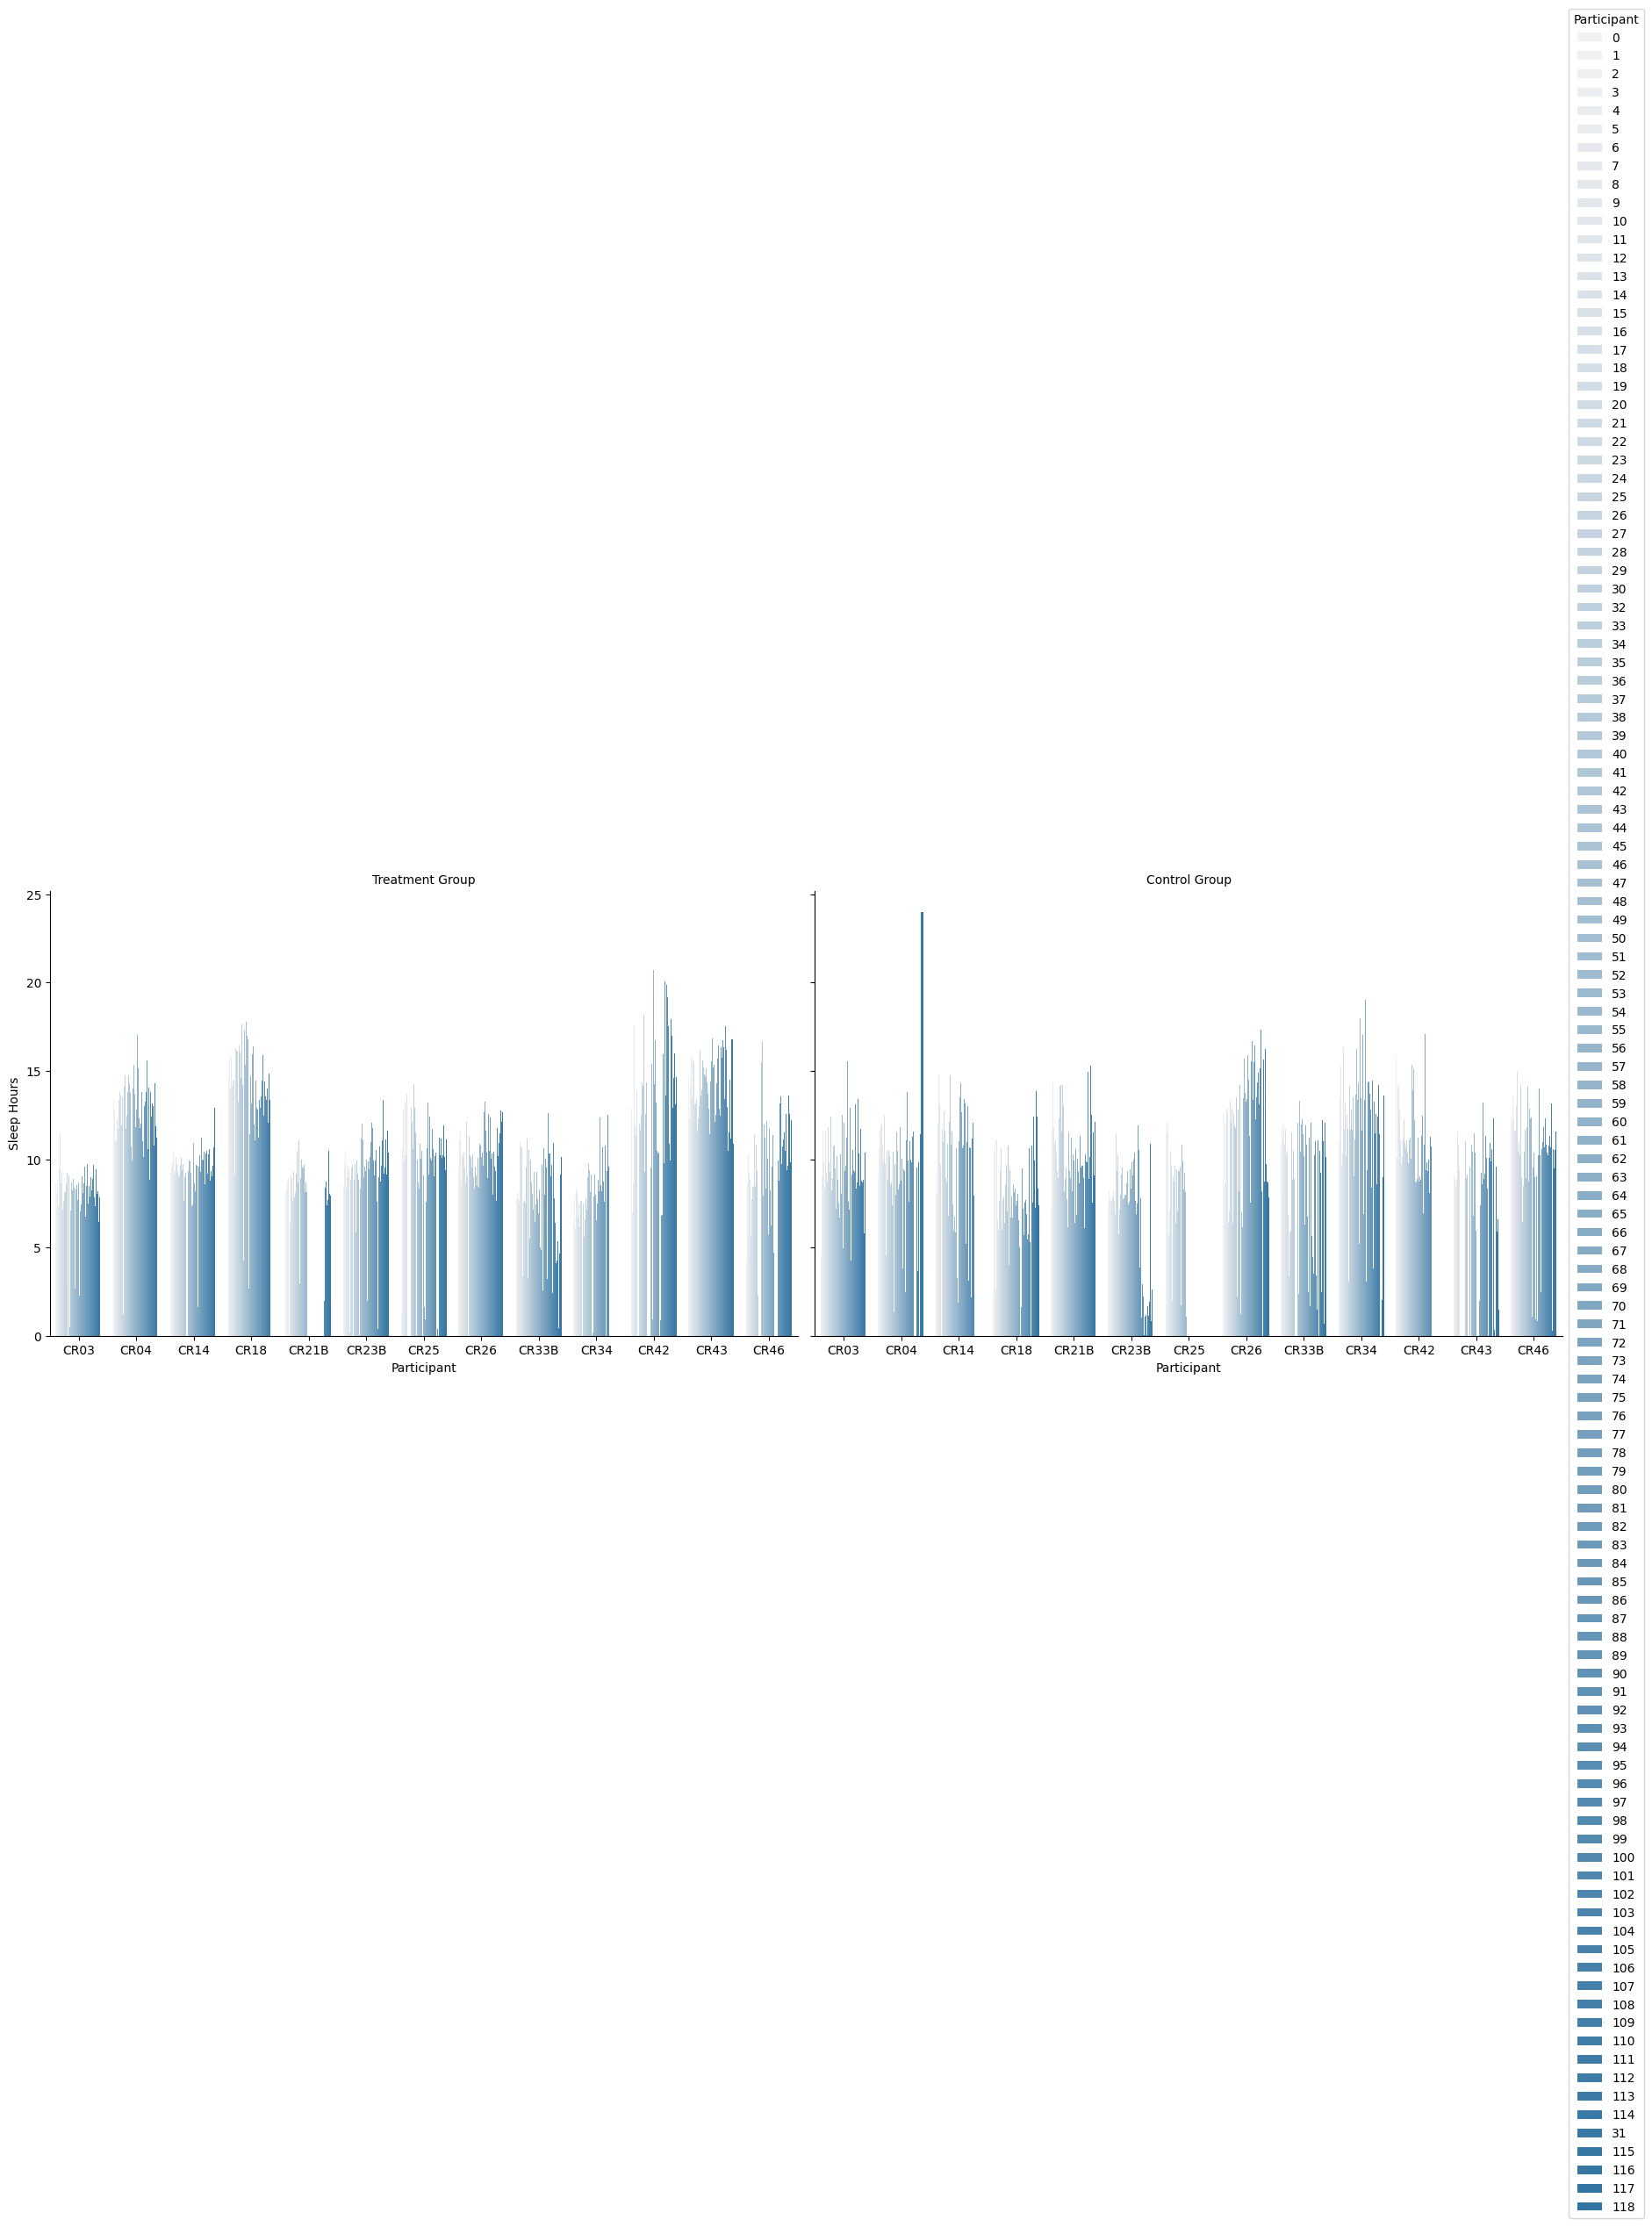

In [ ]:
# Set up the figure and axis
g = sns.FacetGrid(merged_df, col="group", height=6, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x="PARTICIPANT", y="Sleep", hue="DAY_NUM", ci=None)

# Set titles, axis labels, and legend
g.set_titles("{col_name} Group")
g.set_axis_labels("Participant", "Sleep Hours")

plt.legend(title="Day", loc="center left", bbox_to_anchor=(1, 0.5), labels=merged_df["DAY_NUM"].unique())

plt.tight_layout()
plt.show()

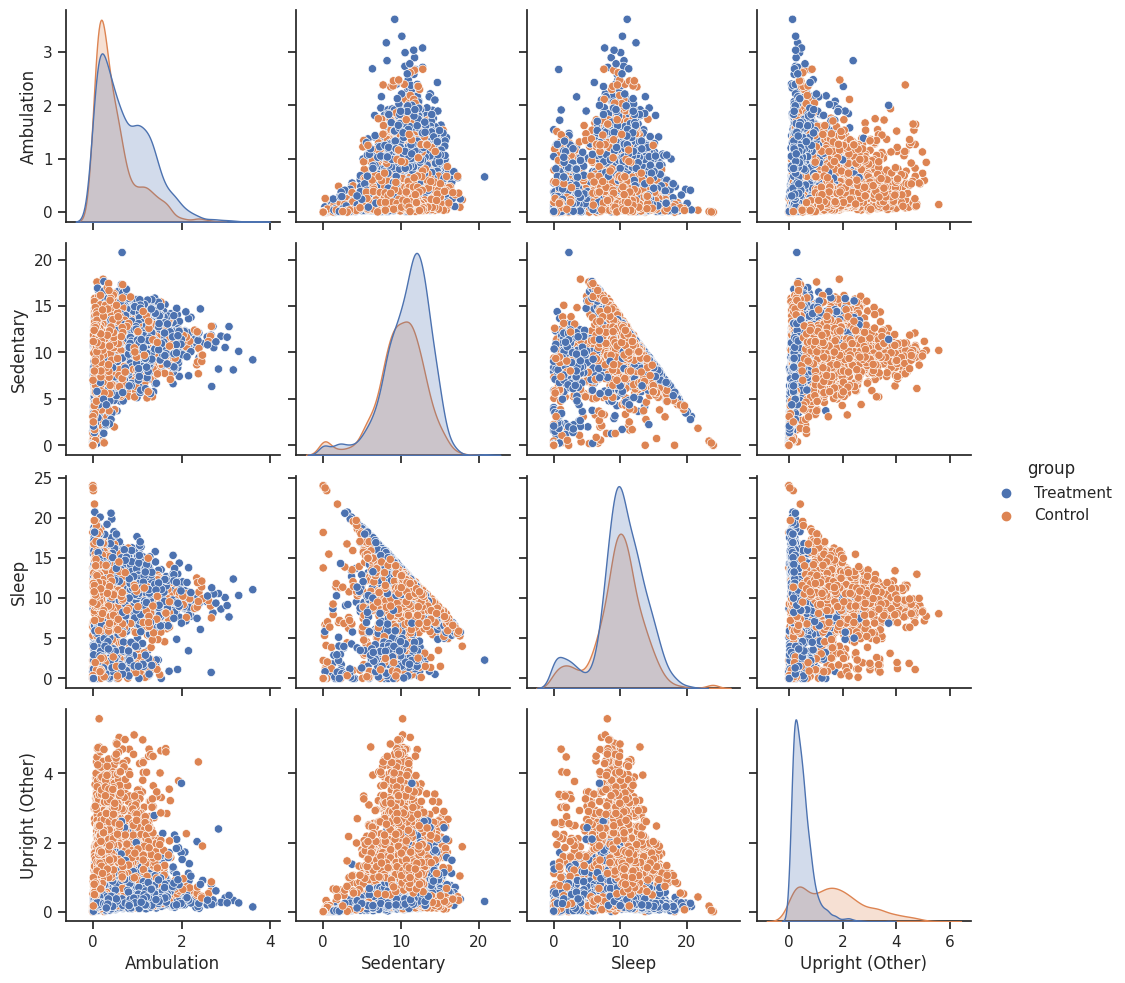

In [ ]:
df_previsual = merged_df[["Ambulation",	"Sedentary", "Sleep",	"Upright (Other)", "group"]]
sns.set_theme(style="ticks")


sns.pairplot(df_previsual, hue="group")

Add column 'Date_type

In [ ]:
def check_weekday_or_weekend(date):
    # weekday() function returns the day of the week as an integer (Monday=0, Sunday=6)
    if int(date.weekday()) < 5:
        return 'weekday'
    else:
        return 'weekend'
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])


# Apply this function to each item in the 'date' column and create a new column 'day_type'
df_filtered['Day_type'] = df_filtered['DATE'].apply(check_weekday_or_weekend)

<ipython-input-9-0ee737c743c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])
<ipython-input-9-0ee737c743c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Day_type'] = df_filtered['DATE'].apply(check_weekday_or_weekend)


In [ ]:
def check_weekday(date):
    # weekday() function returns the day of the week as an integer (Monday=0, Sunday=6)
    return int(date.weekday())


df_filtered['Day_of_week'] = df_filtered['DATE'].apply(check_weekday)

<ipython-input-10-f472bb8f56f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Day_of_week'] = df_filtered['DATE'].apply(check_weekday)


In [ ]:
df_filtered.head(10)

,PARTICIPANT,DAY_NUM,WEEK_NUM,DATE,Ambulation,Incomplete_Predictions,Nonwear,Sedentary,Sleep,Upright (Other),HOURS_COVERAGE,Day_type,Day_of_week
3,CR01,0,0,2021-04-19,1.761667,0.013333,0.0,13.115000,8.633333,0.476667,24.000000,weekday,0
4,CR01,1,0,2021-04-20,0.718889,0.016667,0.0,15.331667,7.616944,0.315833,24.000000,weekday,1
5,CR01,2,0,2021-04-21,1.124167,0.017778,0.0,14.411667,8.075000,0.371389,24.000000,weekday,2
6,CR01,3,0,2021-04-22,0.473056,0.016667,0.0,14.856667,8.341667,0.311944,24.000000,weekday,3
7,CR01,4,0,2021-04-23,2.063333,0.021389,0.0,12.088611,8.883333,0.943333,24.000000,weekday,4
8,CR01,5,0,2021-04-24,1.609167,0.014167,0.0,11.923333,9.325000,1.128333,24.000000,weekend,5
9,CR01,6,0,2021-04-25,1.438889,0.014167,0.0,14.660000,7.341667,0.545278,24.000000,weekend,6
10,CR01,7,1,2021-04-26,0.969444,0.017778,0.0,13.625000,8.558333,0.829444,24.000000,weekday,0
11,CR01,8,1,2021-04-27,0.594722,0.017778,0.0,16.465556,6.508333,0.413611,24.000000,weekday,1
12,CR01,9,1,2021-04-28,0.149167,0.003611,0.0,4.261111,9.500278,0.277778,14.191944,weekday,2


Add column total activities time

In [44]:
merged_df['Activities_no_sleep'] =  merged_df[['Ambulation','Sedentary', 'Upright (Other)']].sum(axis = 1)

In [45]:
merged_df

,PARTICIPANT,DAY_NUM,WEEK_NUM,DATE,Ambulation,Incomplete_Predictions,Nonwear,Sedentary,Sleep,Upright (Other),HOURS_COVERAGE,group,Activities_no_sleep
0,CR01,0,0,2021-04-19,1.761667,0.013333,0.000000,13.115000,8.633333,0.476667,24.000000,Treatment,15.353333
1,CR01,1,0,2021-04-20,0.718889,0.016667,0.000000,15.331667,7.616944,0.315833,24.000000,Treatment,16.366389
2,CR01,2,0,2021-04-21,1.124167,0.017778,0.000000,14.411667,8.075000,0.371389,24.000000,Treatment,15.907222
3,CR01,3,0,2021-04-22,0.473056,0.016667,0.000000,14.856667,8.341667,0.311944,24.000000,Treatment,15.641667
4,CR01,4,0,2021-04-23,2.063333,0.021389,0.000000,12.088611,8.883333,0.943333,24.000000,Treatment,15.095278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,CR46,114,16,2022-07-13,0.042222,0.005833,0.000000,12.851667,10.516667,0.573056,23.989444,Control,13.466944
4533,CR46,115,16,2022-07-14,0.057500,0.000000,0.000000,12.671389,10.400278,0.829444,23.958611,Control,13.558333
4534,CR46,116,16,2022-07-15,0.035556,0.005833,3.883333,7.997500,11.575000,0.492222,23.989444,Control,8.525278
4535,CR46,117,16,2022-07-16,0.177778,0.002500,0.000000,11.996389,11.158333,0.656944,23.991944,Control,12.831111


In [28]:
df_filtered = merged_df

Plot all the activites to see is there any outliers

<Axes: >

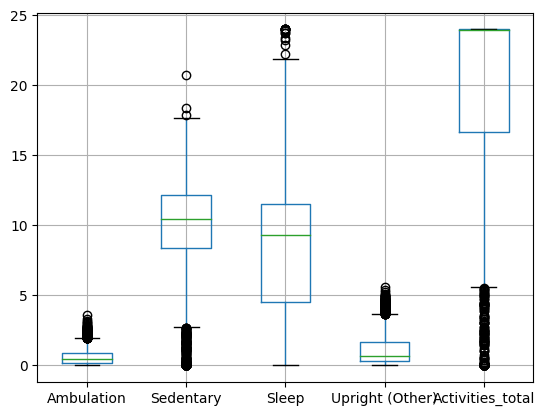

In [31]:
df_filtered.boxplot(column = ['Ambulation', 'Sedentary',	'Sleep',	'Upright (Other)', 'Activities_total'])

In [37]:
weeks = df_filtered[df_filtered['WEEK_NUM'].isin([0, 1, 8, 16])]
weeks

,PARTICIPANT,DAY_NUM,WEEK_NUM,DATE,Ambulation,Incomplete_Predictions,Nonwear,Sedentary,Sleep,Upright (Other),HOURS_COVERAGE,group,Activities_total
0,CR01,0,0,2021-04-19,1.761667,0.013333,0.000000,13.115000,8.633333,0.476667,24.000000,Treatment,23.986667
1,CR01,1,0,2021-04-20,0.718889,0.016667,0.000000,15.331667,7.616944,0.315833,24.000000,Treatment,23.983333
2,CR01,2,0,2021-04-21,1.124167,0.017778,0.000000,14.411667,8.075000,0.371389,24.000000,Treatment,23.982222
3,CR01,3,0,2021-04-22,0.473056,0.016667,0.000000,14.856667,8.341667,0.311944,24.000000,Treatment,23.983333
4,CR01,4,0,2021-04-23,2.063333,0.021389,0.000000,12.088611,8.883333,0.943333,24.000000,Treatment,23.978611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,CR46,114,16,2022-07-13,0.042222,0.005833,0.000000,12.851667,10.516667,0.573056,23.989444,Control,23.983611
4533,CR46,115,16,2022-07-14,0.057500,0.000000,0.000000,12.671389,10.400278,0.829444,23.958611,Control,23.958611
4534,CR46,116,16,2022-07-15,0.035556,0.005833,3.883333,7.997500,11.575000,0.492222,23.989444,Control,20.100278
4535,CR46,117,16,2022-07-16,0.177778,0.002500,0.000000,11.996389,11.158333,0.656944,23.991944,Control,23.989444


How many outliers for each predictors

In [38]:


# List of columns to check
cols_to_check = ['Ambulation', 'Sedentary', 'Sleep', 'Upright (Other)', 'HOURS_COVERAGE']

# Dictionary to store the results
outliers = {}

for col in cols_to_check:
    # Step 1: Calculate IQR
    Q1 = weeks[col].quantile(0.25)
    Q3 = weeks[col].quantile(0.75)
    IQR = Q3 - Q1

    # Step 2: Determine bounds for the whiskers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 3: Count outliers
    num_outliers = weeks[(weeks[col] < lower_bound) | (weeks[col] > upper_bound)].shape[0]

    # Store the number of outliers in the dictionary
    outliers[col] = num_outliers

# Display the results
for col, num_outliers in outliers.items():
    print(f"Column {col} has {num_outliers} outliers.")


Column Ambulation has 54 outliers.
Column Sedentary has 53 outliers.
Column Sleep has 7 outliers.
Column Upright (Other) has 38 outliers.
Column HOURS_COVERAGE has 238 outliers.


array([[<Axes: title={'center': 'Activities_total'}>]], dtype=object)

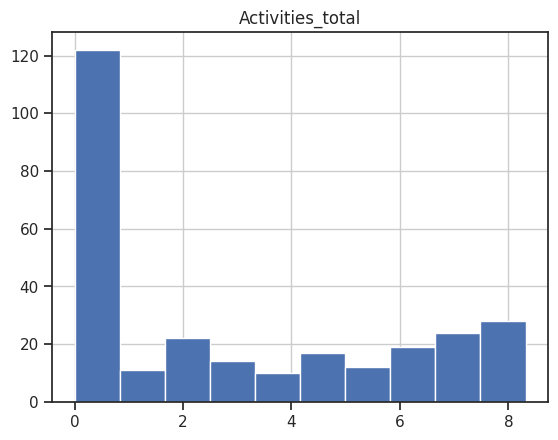

In [ ]:
# Calculate the IQR for the 'Sleep' column
Q1 = df_filtered['Activities_total'].quantile(0.30)
Q3 = df_filtered['Activities_total'].quantile(0.70)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame for outliers in the 'Sleep' column
outliers_total = df_filtered[(df_filtered['Activities_total'] < lower_bound) | (df_filtered['Activities_total'] > upper_bound)]

# Display the outlier rows
outliers_total.hist(['Activities_total'])


array([[<Axes: title={'center': 'Activities_total'}>]], dtype=object)

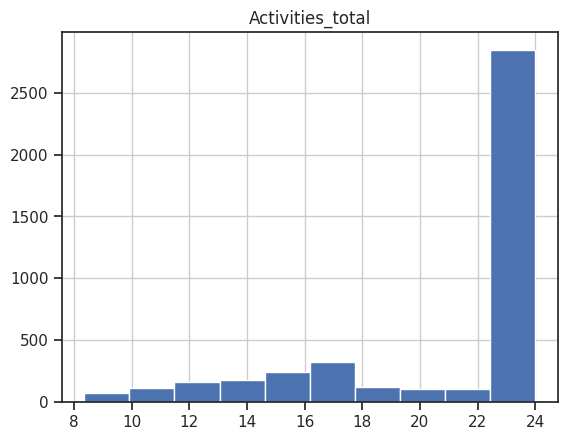

In [ ]:
no_outliers_total = df_filtered[(df_filtered['Activities_total'] >= lower_bound) & (df_filtered['Activities_total'] <= upper_bound)]
no_outliers_total.hist(column = ['Activities_total'])

array([[<Axes: title={'center': 'Sleep'}>]], dtype=object)

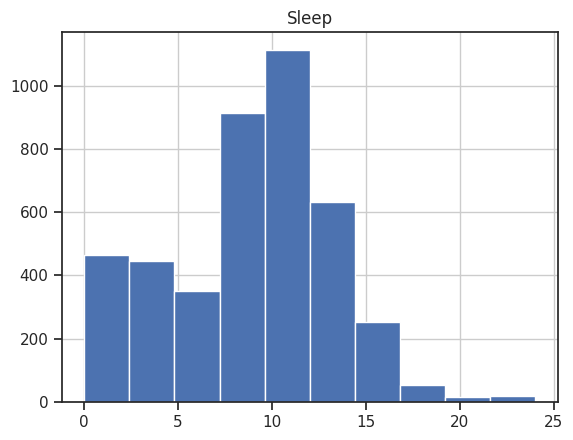

In [ ]:
no_outliers_total.hist(column = ['Sleep'])

array([[<Axes: title={'center': 'Sleep'}>]], dtype=object)

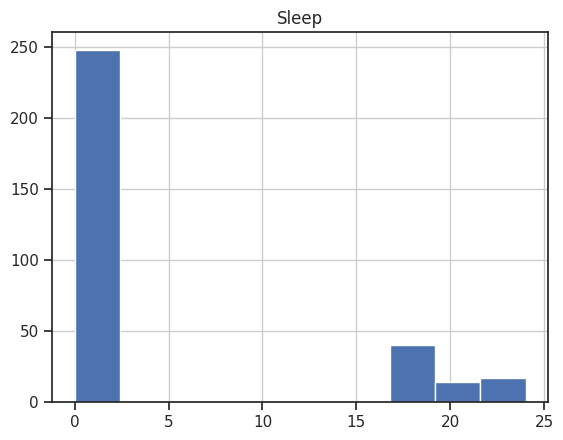

In [ ]:
# Calculate the IQR for the 'Sleep' column
Q1 = no_outliers_total['Sleep'].quantile(0.30)
Q3 = no_outliers_total['Sleep'].quantile(0.70)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame for outliers in the 'Sleep' column
outliers_sleep = no_outliers_total[(no_outliers_total['Sleep'] < lower_bound) | (no_outliers_total['Sleep'] > upper_bound)]

# Display the outlier rows
outliers_sleep.hist('Sleep')



Filtter out the sleep outliers int the dataset

array([[<Axes: title={'center': 'Sleep'}>]], dtype=object)

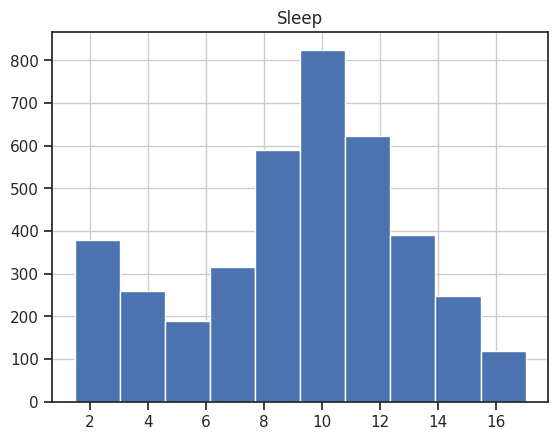

In [ ]:

# Filter the DataFrame to keep only rows with non-outlier values in the 'Sleep' column
no_outliers_sleep = no_outliers_total[(no_outliers_total['Sleep'] >= lower_bound) & (no_outliers_total['Sleep'] <= upper_bound)]
no_outliers_sleep.hist(column = ['Sleep'])

array([[<Axes: title={'center': 'Ambulation'}>]], dtype=object)

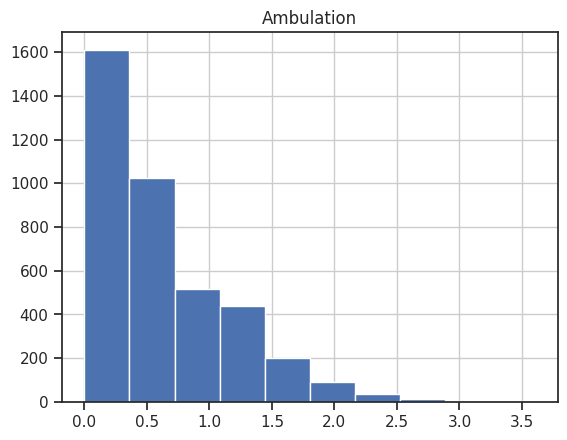

In [ ]:
no_outliers_sleep.hist(column = ['Ambulation'])

array([[<Axes: title={'center': 'Ambulation'}>]], dtype=object)

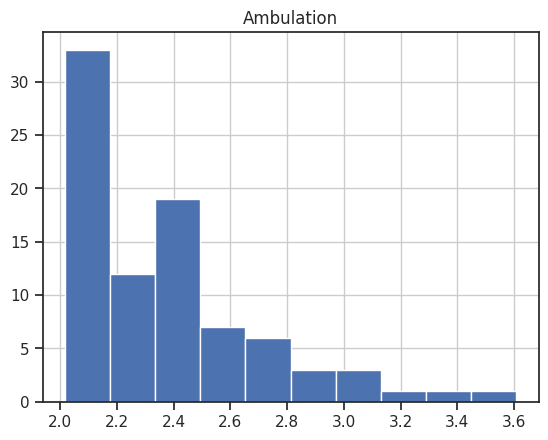

In [ ]:
Q1 = no_outliers_sleep['Ambulation'].quantile(0.25)
Q3 = no_outliers_sleep['Ambulation'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame for outliers in the 'Sleep' column
outliers_Ambulation = no_outliers_sleep[(no_outliers_sleep['Ambulation'] < lower_bound) | (no_outliers_sleep['Ambulation'] > upper_bound)]

# Display the outlier rows
outliers_Ambulation.hist(column =['Ambulation'] )

array([[<Axes: title={'center': 'Ambulation'}>]], dtype=object)

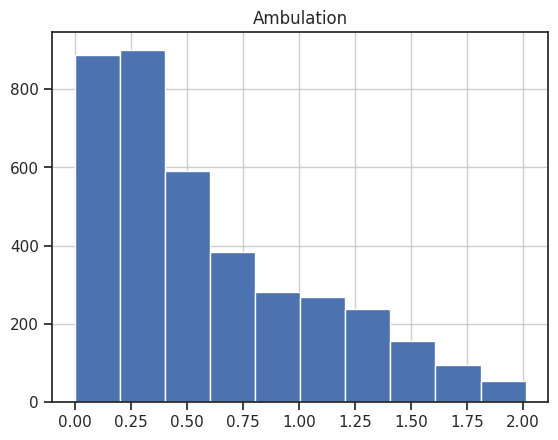

In [ ]:
no_outliers_ambu = no_outliers_sleep[(no_outliers_sleep['Ambulation'] >= lower_bound) & (no_outliers_sleep['Ambulation'] <= upper_bound)]
no_outliers_ambu.hist(column = ['Ambulation'])

array([[<Axes: title={'center': 'Sedentary'}>]], dtype=object)

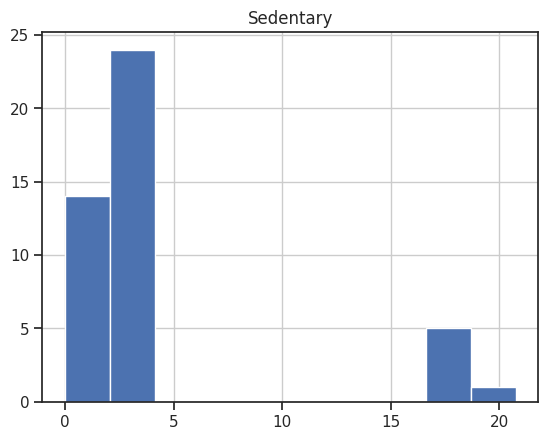

In [ ]:
Q1 = no_outliers_ambu['Sedentary'].quantile(0.25)
Q3 = no_outliers_ambu['Sedentary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers_Sedentary = no_outliers_ambu[(no_outliers_ambu['Sedentary'] < lower_bound) | (no_outliers_ambu['Sedentary'] > upper_bound)]

# Display the outlier rows
outliers_Sedentary.hist(column = ['Sedentary'])

array([[<Axes: title={'center': 'Sedentary'}>]], dtype=object)

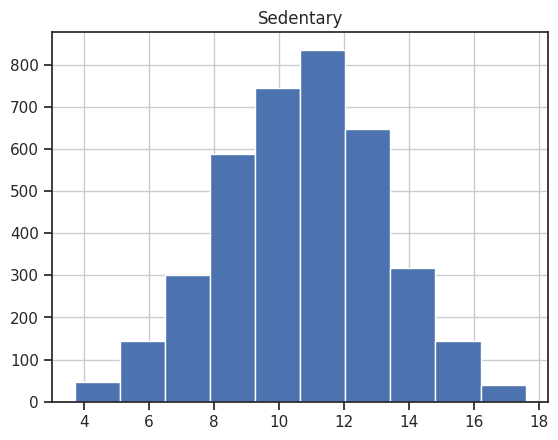

In [ ]:
no_outliers_seden = no_outliers_ambu[(no_outliers_ambu['Sedentary'] >= lower_bound) & (no_outliers_ambu['Sedentary'] <= upper_bound)]
no_outliers_seden.hist(column = ['Sedentary'])

array([[<Axes: title={'center': 'Upright (Other)'}>]], dtype=object)

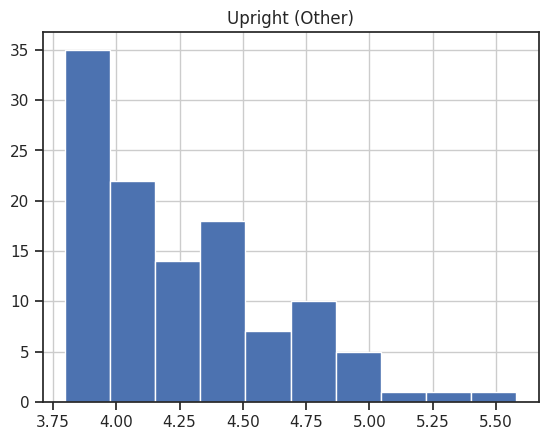

In [ ]:
Q1 = no_outliers_seden['Upright (Other)'].quantile(0.25)
Q3 = no_outliers_seden['Upright (Other)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers_Upright = no_outliers_seden[(no_outliers_seden['Upright (Other)'] < lower_bound) | (no_outliers_seden['Upright (Other)'] > upper_bound)]

# Display the outlier rows
outliers_Upright.hist(column = ['Upright (Other)'])

array([[<Axes: title={'center': 'Upright (Other)'}>]], dtype=object)

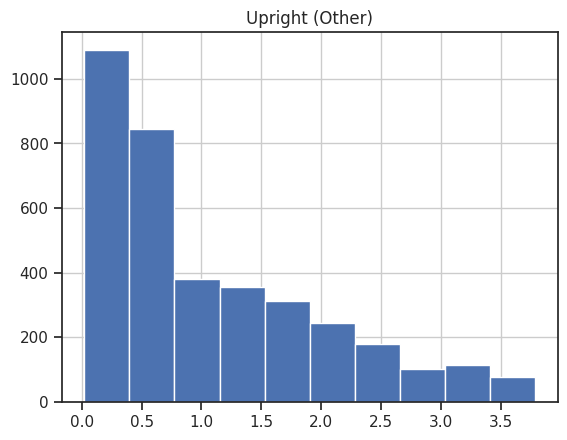

In [ ]:
no_outliers_upright = no_outliers_seden[(no_outliers_seden['Upright (Other)'] >= lower_bound) & (no_outliers_seden['Upright (Other)'] <= upper_bound)]
no_outliers_upright.hist(column = ['Upright (Other)'])

<Axes: >

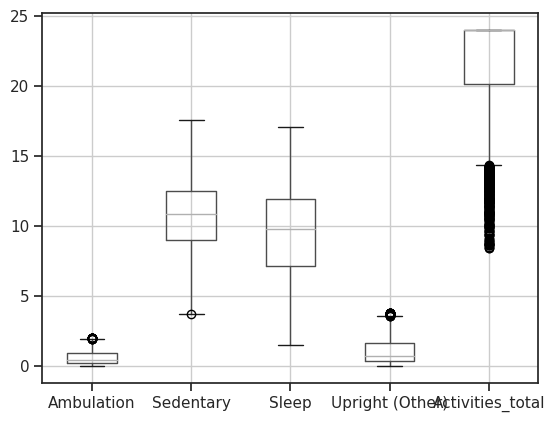

In [ ]:
no_outliers_upright.boxplot(column = ['Ambulation', 'Sedentary',	'Sleep',	'Upright (Other)', 'Activities_total'])

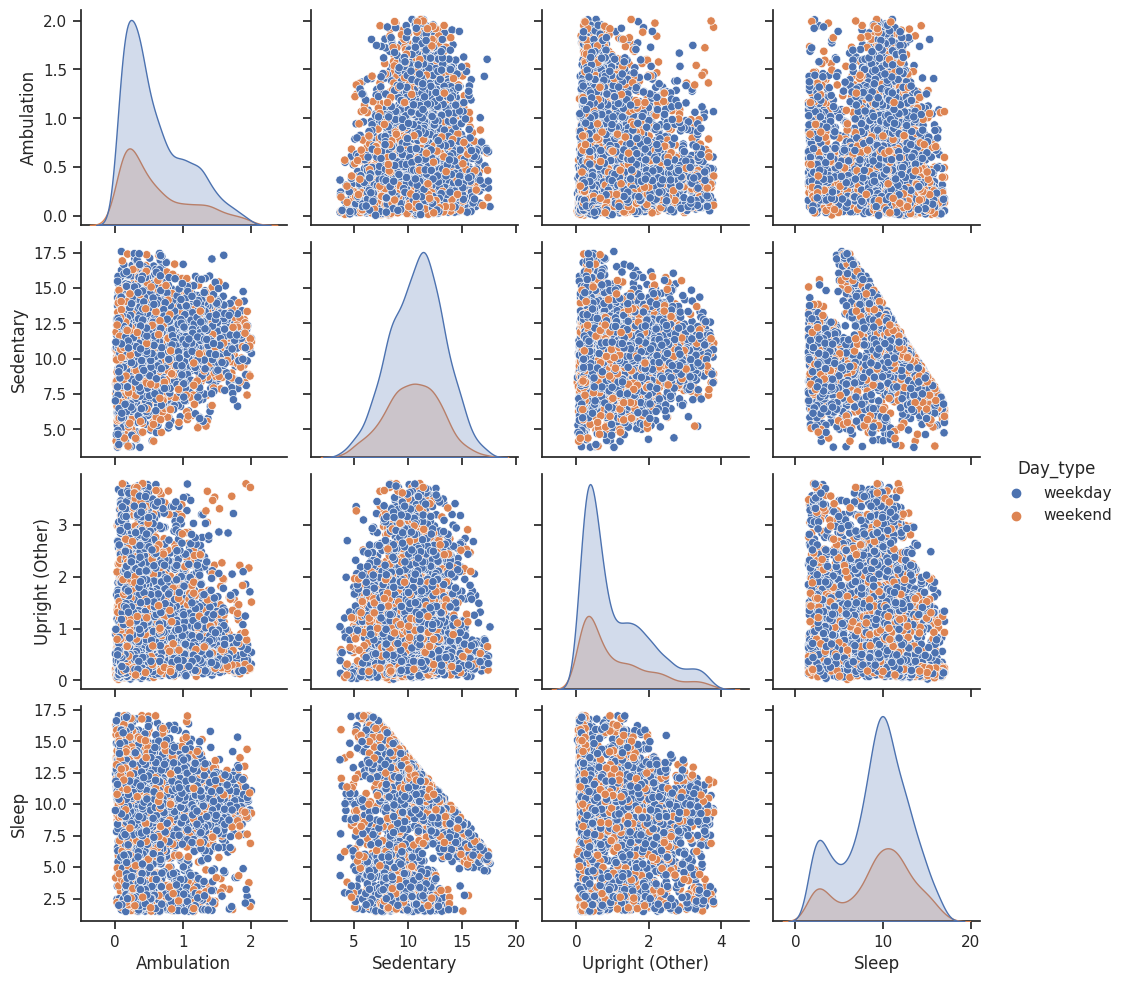

In [ ]:
df_previsual = no_outliers_upright[["Ambulation",	"Sedentary",	"Upright (Other)", "Sleep", "Day_type"]]
sns.set_theme(style="ticks")


sns.pairplot(df_previsual, hue="Day_type")

<ipython-input-29-7acc1ff226f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_upright['Ambulation_ratio'] = no_outliers_upright['Ambulation'] / no_outliers_upright['Activities_total']
<ipython-input-29-7acc1ff226f3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_upright['Sedentary_ratio'] = no_outliers_upright['Sedentary'] / no_outliers_upright['Activities_total']
<ipython-input-29-7acc1ff226f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

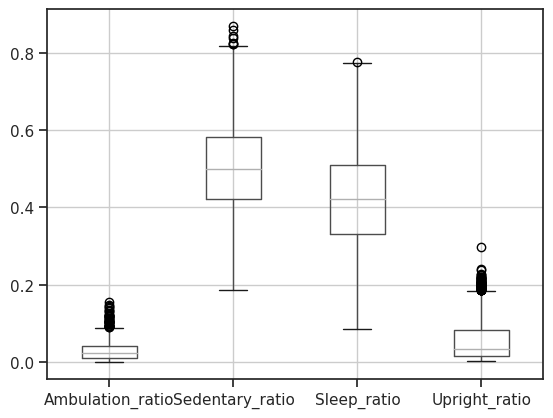

In [ ]:

import matplotlib.pyplot as plt

# Assuming no_outliers_upright is your DataFrame and it has been previously defined.

# Check if 'Activities_total' has any zero values, if so, handle them appropriately (e.g., replace with NaN)
# This is to avoid division by zero errors.
# no_outliers_upright['Activities_total'].replace(0, pd.NA, inplace=True)

# Calculate the ratio of the other columns to 'Activities_total'
no_outliers_upright['Ambulation_ratio'] = no_outliers_upright['Ambulation'] / no_outliers_upright['Activities_total']
no_outliers_upright['Sedentary_ratio'] = no_outliers_upright['Sedentary'] / no_outliers_upright['Activities_total']
no_outliers_upright['Sleep_ratio'] = no_outliers_upright['Sleep'] / no_outliers_upright['Activities_total']
no_outliers_upright['Upright_ratio'] = no_outliers_upright['Upright (Other)'] / no_outliers_upright['Activities_total']

# Now create a boxplot with these new ratio columns
no_outliers_upright.boxplot(column=['Ambulation_ratio', 'Sedentary_ratio', 'Sleep_ratio', 'Upright_ratio'])

# Show the plot
plt.show()


In [ ]:
def outliers(input_df, col, q):
    Q1 = input_df[col].quantile(q)
    Q3 = input_df[col].quantile(1- q)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = input_df[(input_df[col] < lower_bound) | (input_df[col] > upper_bound)]

    # Display the outlier rows
    outliers.hist(column = [col])
    no_outliers = input_df[(input_df[col] >= lower_bound) & (input_df[col] <= upper_bound)]
    no_outliers.hist(column = [col])

    return no_outliers

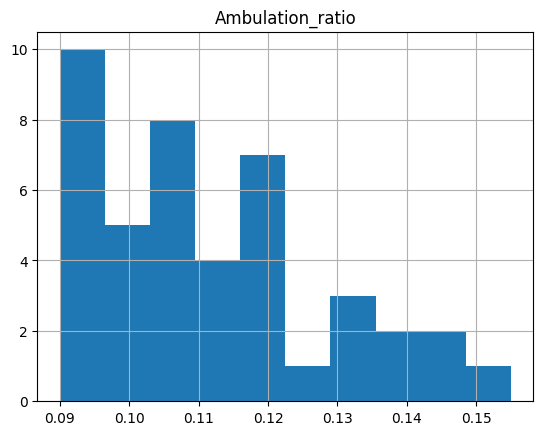

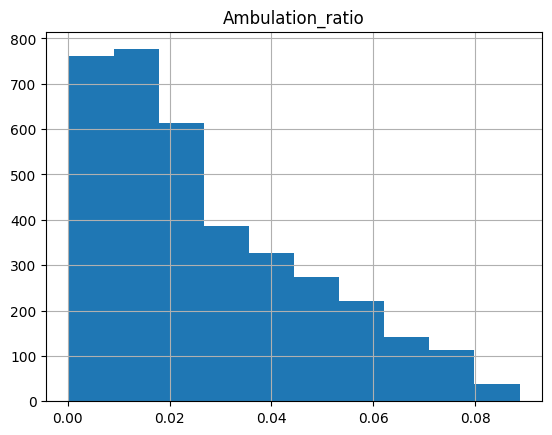

In [ ]:
no_out_ambu_r = outliers(no_outliers_upright, 'Ambulation_ratio', 0.25)

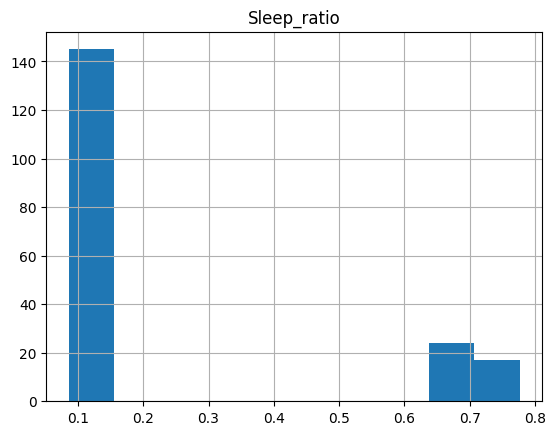

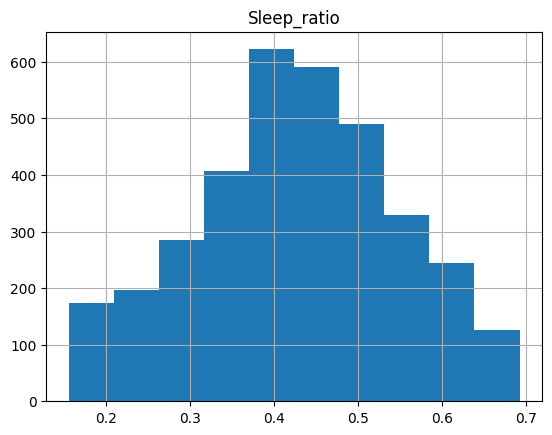

In [ ]:
no_out_sleep_r = outliers(no_out_ambu_r, 'Sleep_ratio', 0.30)

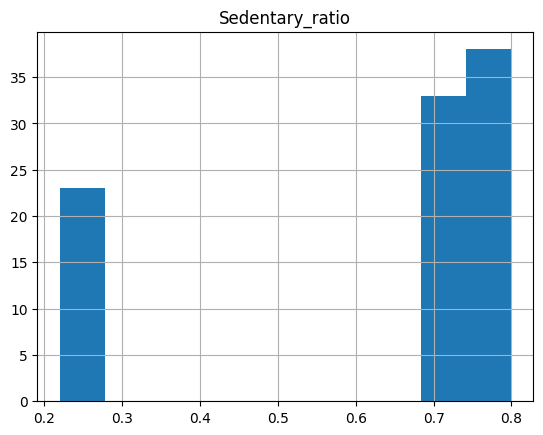

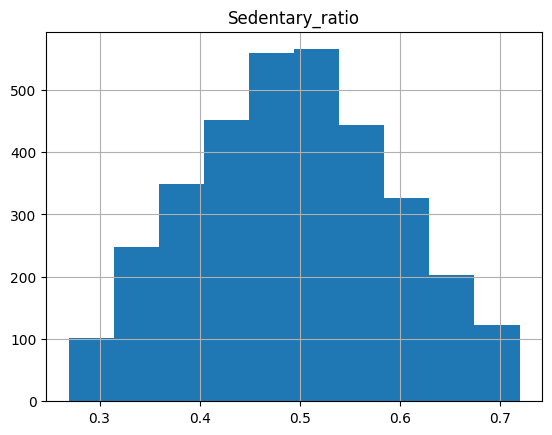

In [ ]:
no_out_seden_r = outliers(no_out_sleep_r, 'Sedentary_ratio', 0.30)

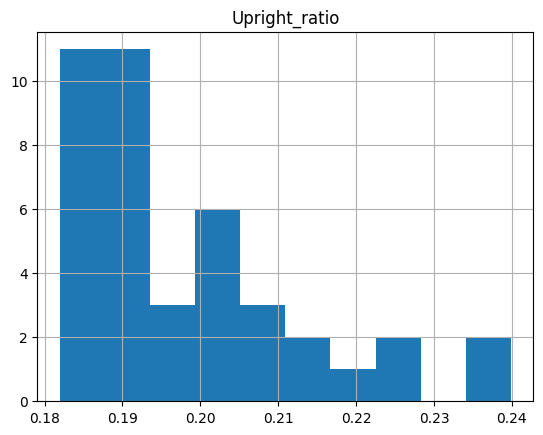

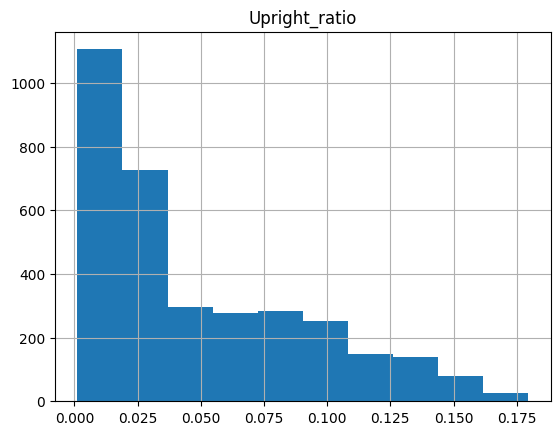

In [ ]:
no_out_up_r = outliers(no_out_seden_r, 'Upright_ratio', 0.25)

Show activities ratio time in different day of weeeks

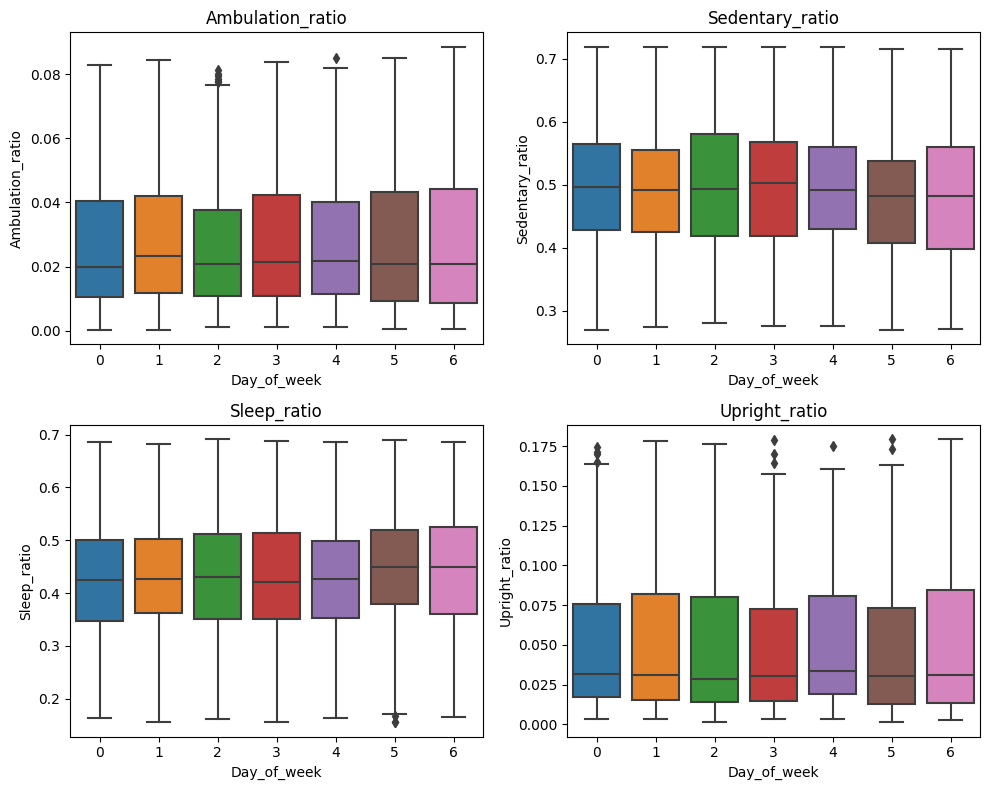

In [ ]:
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 8))
for i, activity in enumerate(['Ambulation_ratio', 'Sedentary_ratio', 'Sleep_ratio', 'Upright_ratio'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Day_of_week", y=activity, data= no_out_up_r)
    plt.title(activity)

plt.tight_layout()
plt.show()

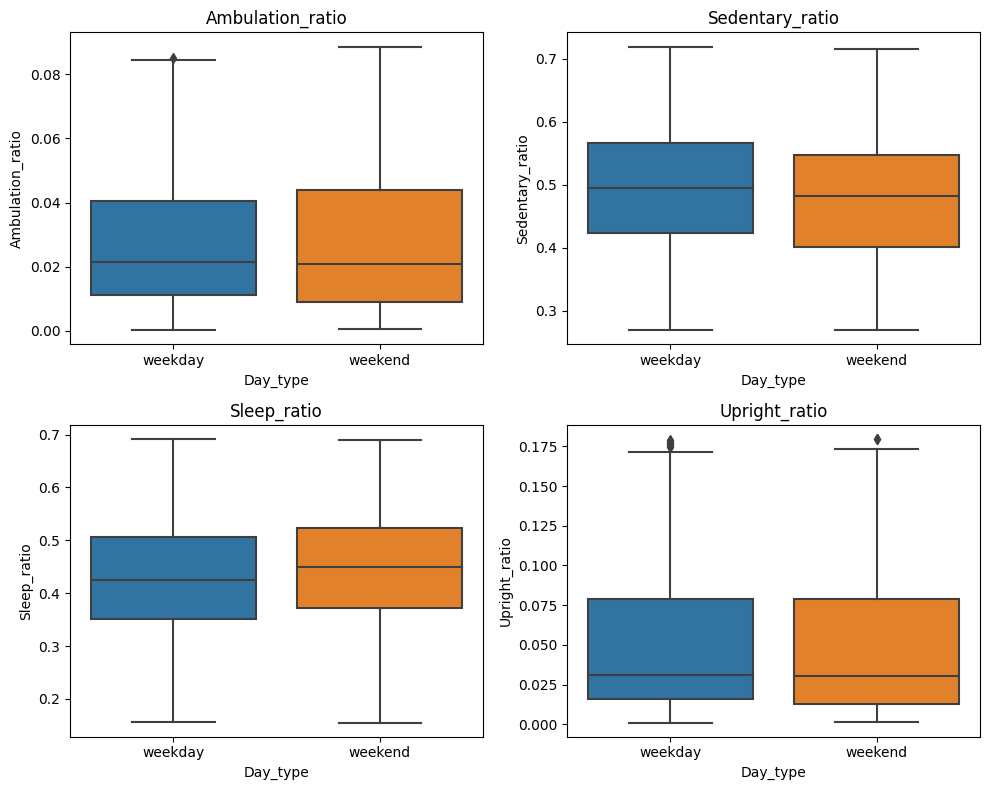

In [ ]:


# Plotting
plt.figure(figsize=(10, 8))
for i, activity in enumerate(['Ambulation_ratio', 'Sedentary_ratio', 'Sleep_ratio', 'Upright_ratio'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Day_type", y=activity, data= no_out_up_r)
    plt.title(activity)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('drive',  force_remount=True)
no_out_up_r.to_csv('drive/MyDrive/Colab Notebooks/L_by_day_clean.csv')
# !cp data.csv "drive/MyDrive/Colab Notebooks"

Mounted at drive


In [ ]:
# Group by PARTICIPANT and Day_type
grouped = no_out_up_r.groupby(['PARTICIPANT', 'Day_type'])

# Calculate total hours for each activity
total_hours = grouped[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].sum()

# Calculate mean, median, std of the ratio for each activity to Activities_total
mean_ratio = grouped.apply(lambda x: (x[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].div(x['Activities_total'], axis=0)).mean())
median_ratio = grouped.apply(lambda x: (x[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].div(x['Activities_total'], axis=0)).median())
std_ratio = grouped.apply(lambda x: (x[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].div(x['Activities_total'], axis=0)).std())

# Combine the results into a single DataFrame
result = pd.concat([total_hours, mean_ratio.add_prefix('Mean_'), median_ratio.add_prefix('Median_'), std_ratio.add_prefix('Std_')], axis=1)


In [ ]:
result

Ambulation    Sedentary  Upright (Other)        Sleep  \
PARTICIPANT Day_type                                                          
CR01        weekday    57.157778  1033.033333        51.192222   608.136944   
            weekend    33.722778   382.287222        27.988889   250.800556   
CR02        weekday    59.035556   743.571667        24.631111  1022.780833   
            weekend    33.965000   268.176667        12.633333   351.193333   
CR03        weekday    13.174722   532.490556       164.922778   472.949167   
...                          ...          ...              ...          ...   
CR44        weekend    27.161111   293.918056        16.753056   352.376944   
CR45        weekday    22.609722   504.906111        69.759444   218.276667   
            weekend     7.527500   120.517500        16.371667    70.500278   
CR46        weekday    29.498333   895.154444       114.369722   840.188056   
            weekend     9.119722   353.441111        35.685278   338.350556   

                      Mean_Ambulation  Mean_Sedentary  Mean_Upright (Other)  \
PARTICIPANT Day_type                                                          
CR01        weekday          0.032607        0.589152              0.029383   
            weekend          0.048551        0.550180              0.040277   
CR02        weekday          0.031983        0.401703              0.013343   
            weekend          0.050800        0.402797              0.018886   
CR03        weekday          0.011512        0.448900              0.139365   
...                               ...             ...                   ...   
CR44        weekend          0.039570        0.427933              0.024086   
CR45        weekday          0.027622        0.626988              0.086050   
            weekend          0.037623        0.577939              0.079697   
CR46        weekday          0.015617        0.476812              0.061368   
            weekend          0.012493        0.479000              0.048469   

                      Mean_Sleep  Median_Ambulation  Median_Sedentary  \
PARTICIPANT Day_type                                                    
CR01        weekday     0.348858           0.029762          0.597763   
            weekend     0.360993           0.044517          0.555719   
CR02        weekday     0.552971           0.026939          0.399225   
            weekend     0.527517           0.053964          0.400228   
CR03        weekday     0.400223           0.008009          0.449867   
...                          ...                ...               ...   
CR44        weekend     0.508411           0.041782          0.419005   
CR45        weekday     0.259340           0.023935          0.654215   
            weekend     0.304741           0.023092          0.622838   
CR46        weekday     0.446204           0.009242          0.475810   
            weekend     0.460038           0.006690          0.482986   

                      Median_Upright (Other)  Median_Sleep  Std_Ambulation  \
PARTICIPANT Day_type                                                         
CR01        weekday                 0.028269      0.343254        0.012724   
            weekend                 0.040169      0.363806        0.015193   
CR02        weekday                 0.012157      0.556584        0.016918   
            weekend                 0.015760      0.531535        0.020577   
CR03        weekday                 0.138558      0.394618        0.009079   
...                                      ...           ...             ...   
CR44        weekend                 0.011273      0.516138        0.025142   
CR45        weekday                 0.081919      0.234161        0.016430   
            weekend                 0.079164      0.259151        0.024473   
CR46        weekday                 0.058391      0.439578        0.015666   
            weekend                 0.048970      0.465135        0.013710   

 

In [ ]:
drive.mount('drive',  force_remount=True)
result.to_csv('drive/MyDrive/Colab Notebooks/L_sum.csv')


Mounted at drive


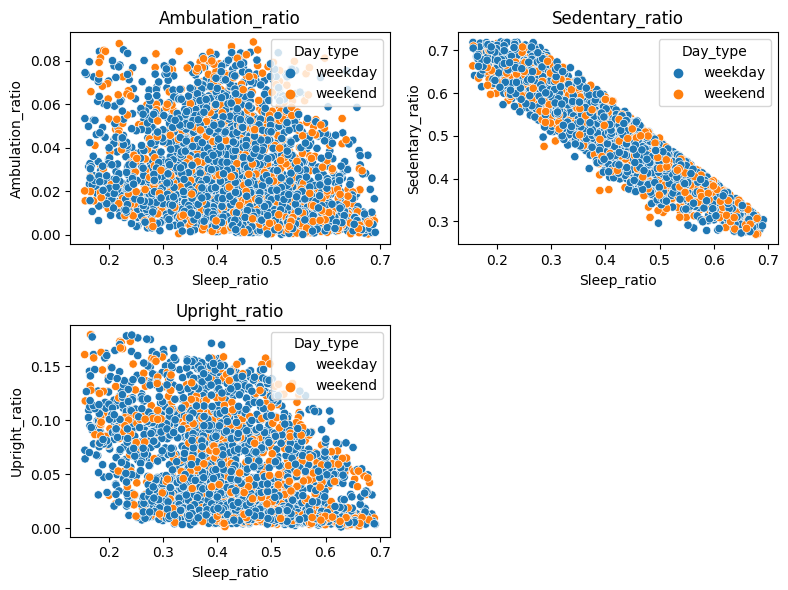

In [ ]:
plt.figure(figsize=(8, 6))
for i, activity in enumerate(['Ambulation_ratio', 'Sedentary_ratio', 'Upright_ratio'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='Sleep_ratio', y=activity, data= no_out_up_r, hue= 'Day_type')
    plt.title(activity)

plt.tight_layout()
plt.show()

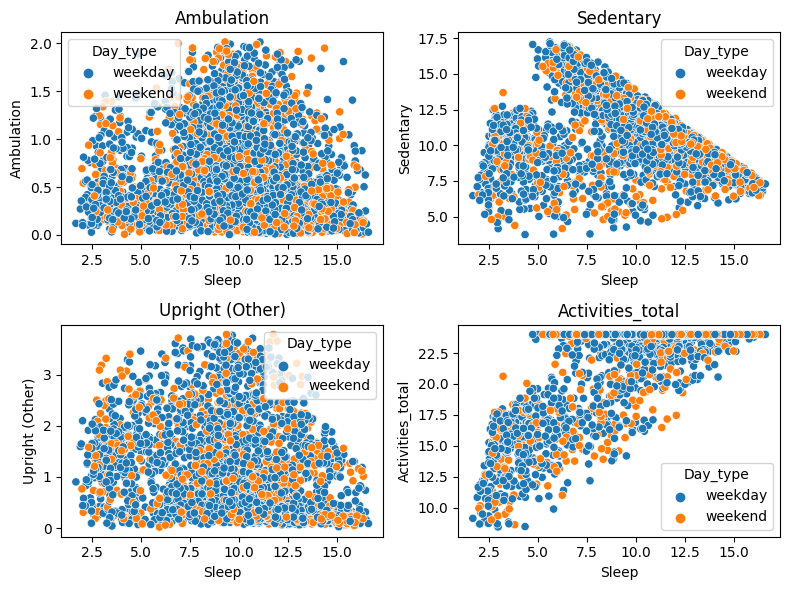

In [ ]:
plt.figure(figsize=(8, 6))
for i, activity in enumerate(['Ambulation', 'Sedentary', 'Upright (Other)', 'Activities_total'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='Sleep', y=activity, data= no_out_up_r, hue= 'Day_type')
    plt.title(activity)

plt.tight_layout()
plt.show()

Add the lable of treatment group or control group

In [ ]:
T_C = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_events_by_pt_only_week80.csv')
T_C.head(3)

,Unnamed: 0,ID,group,Sedentary,Sedentary_DUR_mean,Sedentary_DUR_median,Sedentary_DUR_std,Upright,Upright_DUR_mean,Upright_DUR_median,...,non_sedentary_transitions_upright_per_hour,non_sedentary_transitions_ambulation_per_hour,HOURS_COVERAGE,start,PREDICTED_WEAR_TIME,UNPREDICTED_OR_NONWEAR_TIME,Sedentary_adj,Upright_adj,Sleep_adj,Ambulation_adj
0,0,CR01,Treatment,1406.811111,0.064182,0.014167,0.140921,81.453056,0.005090,0.003611,...,5.222063,3.306052,2443.095556,2021-04-19 00:00:00,2424.412778,18.682778,0.580269,0.033597,0.346786,0.039348
1,1,CR02,Treatment,1046.246944,0.051501,0.014444,0.104589,40.243333,0.004712,0.003611,...,2.747773,4.214878,2622.851667,2021-04-19 00:00:00,2621.210556,1.641111,0.399146,0.015353,0.545870,0.039630
2,2,CR03,Control,963.925556,0.023469,0.007222,0.095690,303.975833,0.007514,0.003611,...,16.959151,0.726584,2297.048889,2021-04-20 12:22:50,2236.502778,60.546111,0.430997,0.135916,0.425154,0.007934


In [ ]:
# T_C = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_events_by_pt_only_week80.csv')


merged_df = no_out_up_r.merge(T_C[['ID', 'group']], left_on='PARTICIPANT', right_on='ID', how='left')

# Drop the ID column as it's redundant
merged_df.drop('ID', axis=1, inplace=True)
merged_df

,PARTICIPANT,DAY_NUM,WEEK_NUM,DATE,Ambulation,Incomplete_Predictions,Nonwear,Sedentary,Sleep,Upright (Other),HOURS_COVERAGE,Day_type,Day_of_week,Activities_total,Ambulation_ratio,Sedentary_ratio,Sleep_ratio,Upright_ratio,group
0,CR01,0,0,2021-04-19,1.761667,0.013333,0.000000,13.115000,8.633333,0.476667,24.000000,weekday,0,23.986667,0.073444,0.546762,0.359922,0.019872,Treatment
1,CR01,1,0,2021-04-20,0.718889,0.016667,0.000000,15.331667,7.616944,0.315833,24.000000,weekday,1,23.983333,0.029975,0.639263,0.317593,0.013169,Treatment
2,CR01,2,0,2021-04-21,1.124167,0.017778,0.000000,14.411667,8.075000,0.371389,24.000000,weekday,2,23.982222,0.046875,0.600931,0.336708,0.015486,Treatment
3,CR01,3,0,2021-04-22,0.473056,0.016667,0.000000,14.856667,8.341667,0.311944,24.000000,weekday,3,23.983333,0.019724,0.619458,0.347811,0.013007,Treatment
4,CR01,5,0,2021-04-24,1.609167,0.014167,0.000000,11.923333,9.325000,1.128333,24.000000,weekend,5,23.985833,0.067088,0.497099,0.388771,0.047042,Treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,CR46,114,16,2022-07-13,0.042222,0.005833,0.000000,12.851667,10.516667,0.573056,23.989444,weekday,2,23.983611,0.001760,0.535852,0.438494,0.023894,Control
3327,CR46,115,16,2022-07-14,0.057500,0.000000,0.000000,12.671389,10.400278,0.829444,23.958611,weekday,3,23.958611,0.002400,0.528887,0.434094,0.034620,Control
3328,CR46,116,16,2022-07-15,0.035556,0.005833,3.883333,7.997500,11.575000,0.492222,23.989444,weekday,4,20.100278,0.001769,0.397880,0.575863,0.024488,Control
3329,CR46,117,16,2022-07-16,0.177778,0.002500,0.000000,11.996389,11.158333,0.656944,23.991944,weekend,5,23.989444,0.007411,0.500069,0.465135,0.027385,Control


In [ ]:
# Group by PARTICIPANT and Day_type
grouped = merged_df.groupby(['PARTICIPANT', 'WEEK_NUM'])

# Calculate total hours for each activity
total_hours = grouped[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].sum()

# Calculate mean, median, std of the ratio for each activity to Activities_total
mean_ratio = grouped.apply(lambda x: (x[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].div(x['Activities_total'], axis=0)).mean())
median_ratio = grouped.apply(lambda x: (x[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].div(x['Activities_total'], axis=0)).median())
std_ratio = grouped.apply(lambda x: (x[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].div(x['Activities_total'], axis=0)).std())

# Get the 'group' column
group_column = grouped['group'].first()

# Combine the results into a single DataFrame
result = pd.concat([group_column, total_hours, mean_ratio.add_prefix('Mean_'), median_ratio.add_prefix('Median_'), std_ratio.add_prefix('Std_')], axis=1)

In [ ]:
result[result['group'] == 'Treatment']

group  Ambulation  Sedentary  Upright (Other)  \
PARTICIPANT WEEK_NUM                                                      
CR01        0         Treatment    7.125833  84.298333         3.149444   
            1         Treatment    4.447778  70.783889         4.493611   
            2         Treatment    6.478611  99.309444         6.027222   
            3         Treatment    5.275000  97.914167         5.796667   
            4         Treatment    5.923889  67.113889         4.635833   
...                         ...         ...        ...              ...   
CR44        12        Treatment    5.834722  77.120833         1.877222   
            13        Treatment    6.457500  70.783333         4.195000   
            14        Treatment    7.042778  62.540833         1.541389   
            15        Treatment    6.285000  71.851944         1.988056   
            16        Treatment    4.848889  49.981667         1.202778   

                          Sleep  Mean_Ambulation  Mean_Sedentary  \
PARTICIPANT WEEK_NUM                                               
CR01        0         49.333611         0.049516        0.585785   
            1         54.350833         0.031633        0.512457   
            2         55.959444         0.038612        0.591926   
            3         58.875000         0.031423        0.583311   
            4         42.225278         0.049404        0.559759   
...                         ...              ...             ...   
CR44        12        83.167222         0.034730        0.459053   
            13        75.708611         0.040523        0.450682   
            14        70.633611         0.049587        0.441534   
            15        87.875000         0.037411        0.427690   
            16        57.350000         0.043000        0.436791   

                      Mean_Upright (Other)  Mean_Sleep  Median_Ambulation  \
PARTICIPANT WEEK_NUM                                                        
CR01        0                     0.021885    0.342815           0.053432   
            1                     0.032568    0.423343           0.035917   
            2                     0.035920    0.333542           0.034724   
            3                     0.034530    0.350737           0.030711   
            4                     0.038659    0.352177           0.049267   
...                                    ...         ...                ...   
CR44        12                    0.011174    0.495043           0.035000   
            13                    0.025991    0.482803           0.038495   
            14                    0.010886    0.497993           0.052708   
            15                    0.011834    0.523065           0.034190   
            16                    0.010573    0.509636           0.047028   

                      Median_Sedentary  Median_Upright (Other)  Median_Sleep  \
PARTICIPANT WEEK_NUM                                                           
CR01        0                 0.606063                0.017679      0.342259   
            1                 0.541844                0.033404      0.381709   
            2                 0.592524                0.031220      0.320828   
            3                 0.577253                0.031526      0.348163   
            4                 0.562512                0.033667      0.363618   
...                                ...                     ...           ...   
CR44        12                0.461042                0.009815      0.493403   
            13                0.451644                0.016262      0.515278   
            14                0.444109                0.011998      0.493924   
            15                0.414965                0.009051      0.517014   
            16                0.467951                0.009971      0.493750   

                      Std_Ambulation  Std_Sedentary  Std_Upright (Other)  \
PARTICIPANT WEEK_NUM                          

In [ ]:
treatment = result[result['group'] == 'Treatment']

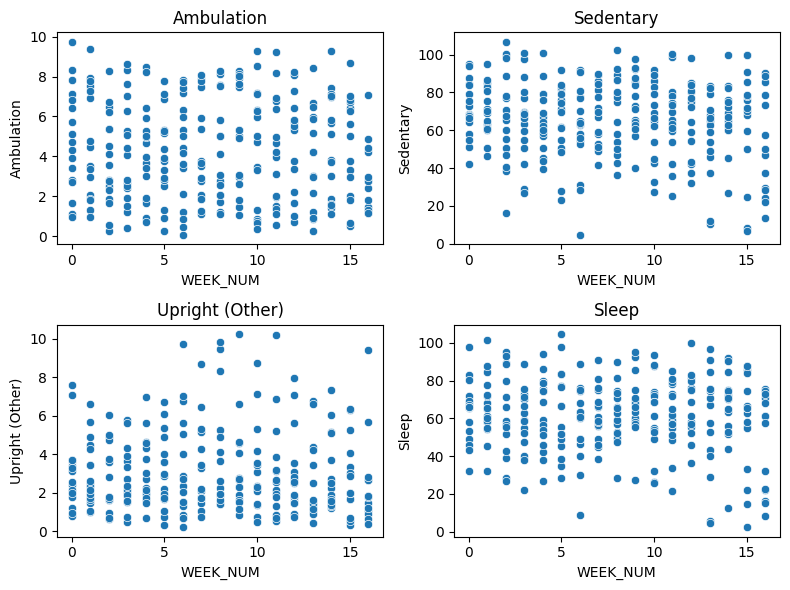

In [ ]:
plt.figure(figsize=(8, 6))
for i, activity in enumerate(['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='WEEK_NUM', y=activity, data= treatment)
    plt.title(activity)

plt.tight_layout()
plt.show()

In [ ]:
control = result[result['group'] == 'Control']

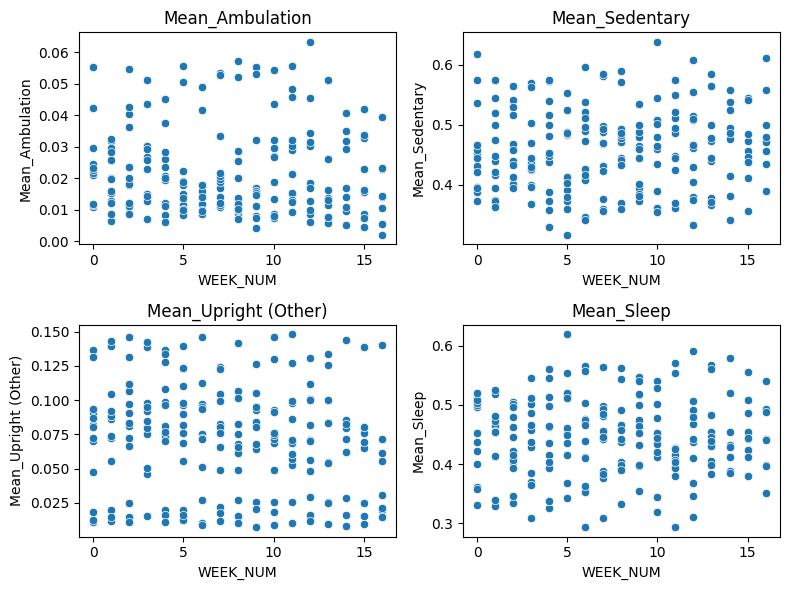

In [ ]:
plt.figure(figsize=(8, 6))
for i, activity in enumerate(['Mean_Ambulation', 'Mean_Sedentary', 'Mean_Upright (Other)', 'Mean_Sleep'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='WEEK_NUM', y=activity, data= control)
    plt.title(activity)

plt.tight_layout()
plt.show()

Different by day of week

In [ ]:
# Group by PARTICIPANT and Day_of_week
grouped = merged_df.groupby(['PARTICIPANT', 'Day_of_week'])

# Calculate total hours for each activity
total_hours = grouped[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].sum()

# Calculate mean, median, std of the ratio for each activity to Activities_total
mean_ratio = grouped.apply(lambda x: (x[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].div(x['Activities_total'], axis=0)).mean())
median_ratio = grouped.apply(lambda x: (x[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].div(x['Activities_total'], axis=0)).median())
std_ratio = grouped.apply(lambda x: (x[['Ambulation', 'Sedentary', 'Upright (Other)', 'Sleep']].div(x['Activities_total'], axis=0)).std())

# Get the 'group' column
group_column = grouped['group'].first()

# Combine the results into a single DataFrame
result_days = pd.concat([group_column, total_hours, mean_ratio.add_prefix('Mean_'), median_ratio.add_prefix('Median_'), std_ratio.add_prefix('Std_')], axis=1)

In [ ]:
result_days

group  Ambulation   Sedentary  Upright (Other)  \
PARTICIPANT Day_of_week                                                       
CR01        0            Treatment   14.138611  236.591389        12.835556   
            1            Treatment   11.007222  216.719167         9.185556   
            2            Treatment   10.623056  204.686667         9.443056   
            3            Treatment    8.266667  188.639722         7.638611   
            4            Treatment   13.122222  186.396389        12.089444   
...                            ...         ...         ...              ...   
CR46        2              Control    5.553056  158.586944        18.868333   
            3              Control    6.601389  188.121111        18.935000   
            4              Control    5.553889  197.162778        27.041389   
            5              Control    4.510556  192.553056        17.909722   
            6              Control    4.609167  160.888056        17.775556   

                              Sleep  Mean_Ambulation  Mean_Sedentary  \
PARTICIPANT Day_of_week                                                
CR01        0            139.100556         0.035059        0.586802   
            1            116.109167         0.031592        0.615816   
            2            124.301389         0.029859        0.578629   
            3            104.508889         0.026769        0.610150   
            4            124.116944         0.039084        0.555214   
...                             ...              ...             ...   
CR46        2            151.142222         0.016728        0.475119   
            3            187.135278         0.016411        0.468749   
            4            167.609444         0.013921        0.495128   
            5            187.866389         0.011459        0.476779   
            6            150.484167         0.013749        0.481696   

                         Mean_Upright (Other)  Mean_Sleep  Median_Ambulation  \
PARTICIPANT Day_of_week                                                        
CR01        0                        0.031946    0.346193           0.030467   
            1                        0.026873    0.325719           0.029975   
            2                        0.026847    0.364665           0.025670   
            3                        0.024718    0.338363           0.027212   
            4                        0.036009    0.369694           0.038686   
...                                       ...         ...                ...   
CR46        2                        0.056524    0.451628           0.012708   
            3                        0.047291    0.467549           0.006331   
            4                        0.067993    0.422959           0.010394   
            5                        0.044546    0.467216           0.006968   
            6                        0.053233    0.451323           0.006331   

                         Median_Sedentary  Median_Upright (Other)  \
PARTICIPANT Day_of_week                                             
CR01        0                    0.587919                0.031220   
            1                    0.612097                0.023217   
            2                    0.598904                0.025986   
            3                    0.619458                0.024964   
            4                    0.562312                0.034654   
...                                   ...                     ...   
CR46        2                    0.473003                0.058767   
            3                    0.495544                0.046637   
            4                    0.490706                0.067060   
            5                    0.487627                0.040475   
            6                    0.457859                0.049202   

                         Median_Sleep  Std_Ambulation  Std_Sedentary  \
PARTICIPANT Day_of_week                              

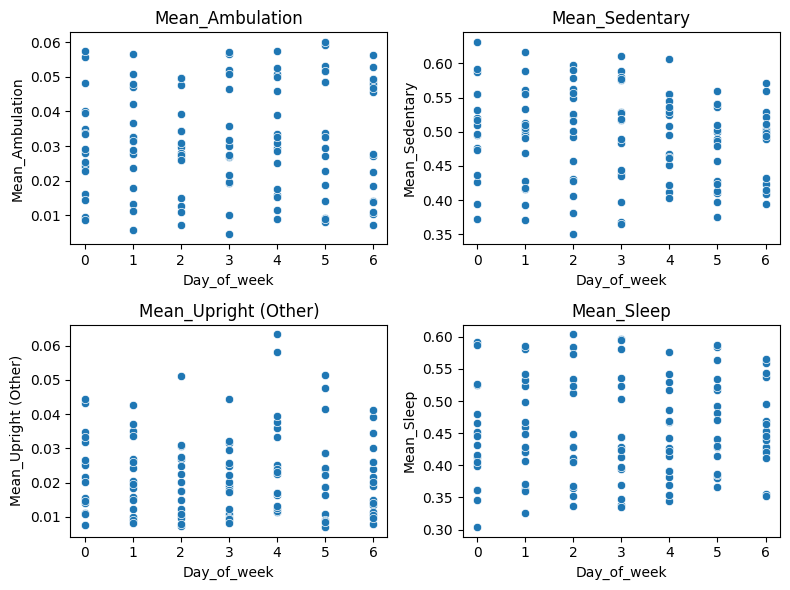

In [ ]:
treatment_days = result_days[result_days['group'] == 'Treatment']

plt.figure(figsize=(8, 6))
for i, activity in enumerate(['Mean_Ambulation', 'Mean_Sedentary', 'Mean_Upright (Other)', 'Mean_Sleep'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='Day_of_week', y= activity, data = treatment_days)

    plt.title(activity)

plt.tight_layout()
plt.show()

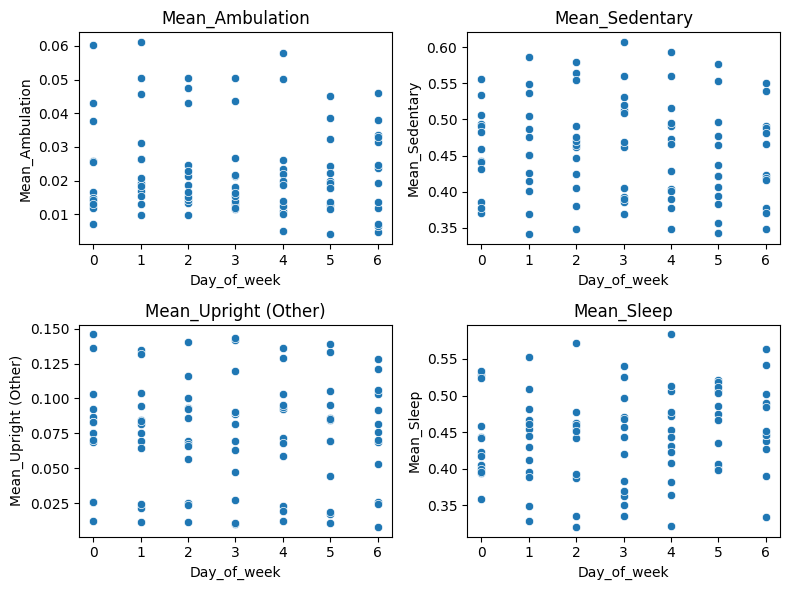

In [ ]:
control_days = result_days[result_days['group'] == 'Control']

plt.figure(figsize=(8, 6))
for i, activity in enumerate(['Mean_Ambulation', 'Mean_Sedentary', 'Mean_Upright (Other)', 'Mean_Sleep'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='Day_of_week', y= activity, data = control_days)

    plt.title(activity)

plt.tight_layout()
plt.show()

In [ ]:

plt.figure(figsize=(8, 6))
for i in range(7):
  day = result_days[result_days['Day_of_week'] == i]
  for i, activity in enumerate(['Mean_Ambulation', 'Mean_Sedentary', 'Mean_Upright (Other)', 'Mean_Sleep'], 1):
      plt.subplot(2, 2, i)
      sns.scatterplot(x='group', y= activity, data = day)

      plt.title(activity)

plt.tight_layout()
plt.show()

KeyError: ignored